In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [23]:
lead_time = 3

In [24]:
year = "2020"
month = "07"
day = "14"
hour = "19"
minute = "00"

In [25]:
input_path = f"/work/scratch-nopw2/mendrika/OB/raw/inputs_t0/input-{year}{month}{day}_{hour}{minute}.pt"
output_path = f"/work/scratch-nopw2/mendrika/OB/raw/targets_t{lead_time}/target-{year}{month}{day}_{hour}{minute}.pt"

inp = torch.load(input_path)
out = torch.load(output_path)

In [32]:
inp 

{'input_tensor': tensor([[[ 1.2246e-16, -1.0000e+00, -9.6593e-01,  ..., -8.2444e+01,
            4.2030e+03,  1.0000e+00],
          [ 1.2246e-16, -1.0000e+00, -9.6593e-01,  ..., -7.2000e+01,
            3.8700e+02,  1.0000e+00],
          [ 1.2246e-16, -1.0000e+00, -9.6593e-01,  ...,  3.0000e+01,
            0.0000e+00,  0.0000e+00],
          ...,
          [ 1.2246e-16, -1.0000e+00, -9.6593e-01,  ...,  3.0000e+01,
            0.0000e+00,  0.0000e+00],
          [ 1.2246e-16, -1.0000e+00, -9.6593e-01,  ...,  3.0000e+01,
            0.0000e+00,  0.0000e+00],
          [ 1.2246e-16, -1.0000e+00, -9.6593e-01,  ...,  3.0000e+01,
            0.0000e+00,  0.0000e+00]],
 
         [[ 1.2246e-16, -1.0000e+00, -9.9144e-01,  ..., -7.2556e+01,
            2.1600e+02,  1.0000e+00],
          [ 1.2246e-16, -1.0000e+00, -9.9144e-01,  ..., -7.2667e+01,
            3.7800e+02,  1.0000e+00],
          [ 1.2246e-16, -1.0000e+00, -9.9144e-01,  ..., -8.0556e+01,
            5.1930e+03,  1.0000e+00],
   

In [26]:
input_tensor = inp["input_tensor"]

Should be 5 time steps, 50 cores and each of them has 13 features

In [27]:
input_tensor.shape

torch.Size([5, 50, 13])

Number of real cores

In [28]:
num_cores = np.sum(inp["input_tensor"][-1, :, :][:,-1].numpy())
print(num_cores)

6.0


Visual check at time t0 

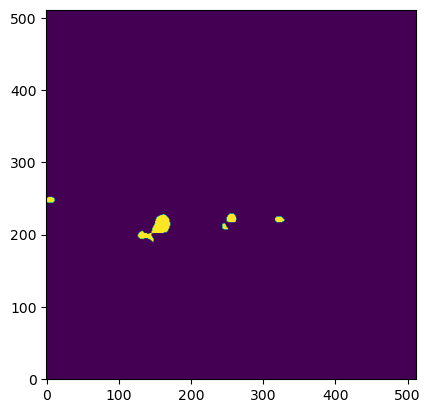

In [29]:
plt.imshow(out["data"].squeeze(0).numpy(), origin="lower")
plt.show()

In [30]:
from scipy.ndimage import label

In [31]:
output_tensor = out["data"].squeeze(0).numpy()
label(output_tensor)[1]-1 # because it also labelled value = 0

5